<a href="https://colab.research.google.com/github/francisco-mgoncalves/STA4032/blob/main/Alexnet_Load_Slides_All_Hahn_(8)_with_my_DataDeck_W_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Suppresses the output of the cell to make the notebook cleaner
%%capture
!pip install wandb #Install wandb for experiment tracking and visualization
!apt-get install poppler-utils #Install poppler-utils to handle PDF files
!pip install pdf2image #Install pdf2image to convert PDF files into images
!pip install flashtorch #Install flashtorch for visualizing CNN activations
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Set up device for PyTorch
#Function to create a PyTorch tensor on GPU with gradient tracking
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)
#Function to create a PyTorch tensor on GPU without gradient tracking
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)
#Function to plot an image
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
#Function to format Google Slide URL to PDF download URL
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id
#Function to retrieve slides as images from a Google Slide URL
def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content) #Write PDF to file
    images = convert_from_path('file.pdf', 500)  #Convert PDF pages to images
    return images
#Function to load an image and apply transformations for model input
def load(image, size=224):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size), #Resize image
        transforms.CenterCrop(size),#Crop image centrally
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)# Transform and move to device
    tensor.requires_grad = True #Enable gradient tracking
    return tensor



In [3]:
#Download and parse label JSON for image classification model
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
#Load pretrained AlexNet model and set to evaluation mode
model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 65.2MB/s]


In [4]:
url = "https://docs.google.com/presentation/d/18ZQunUtJb_Nn3jLbT7KDwjxfGH5NkSQqHZP3AgZFr-4/edit#slide=id.g2d01bae4c9d_2_0"

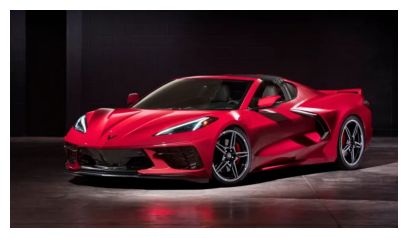

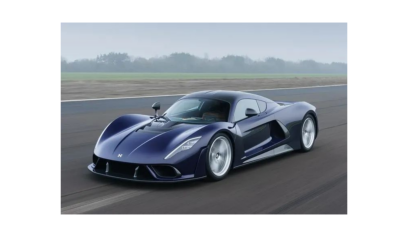

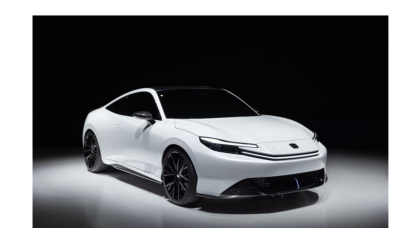

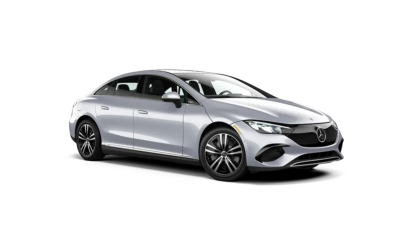

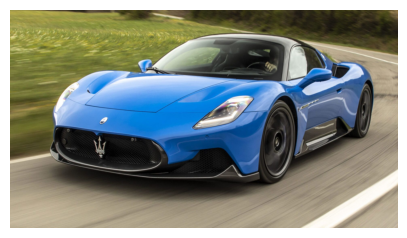

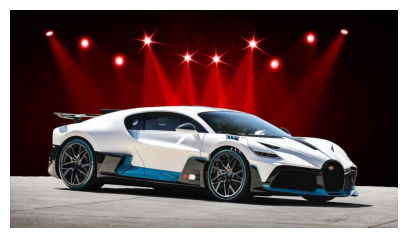

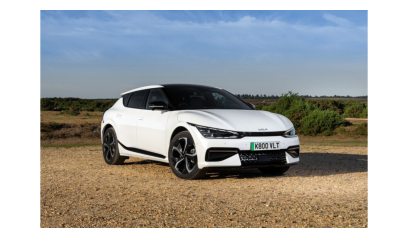

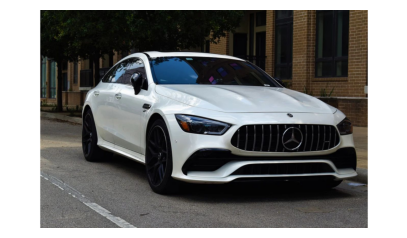

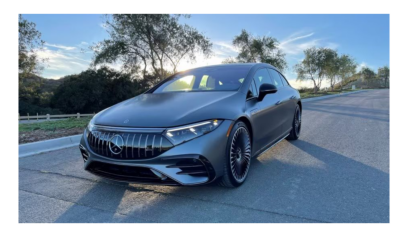

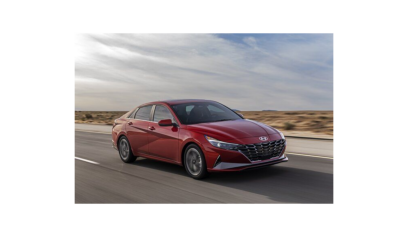

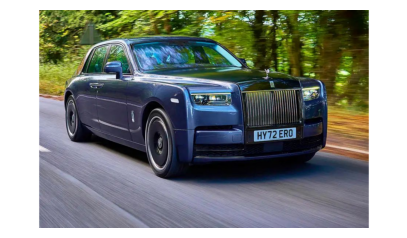

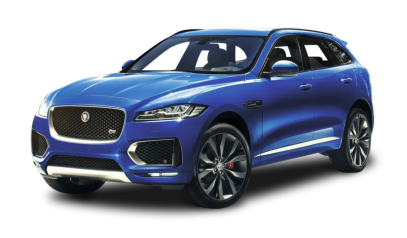

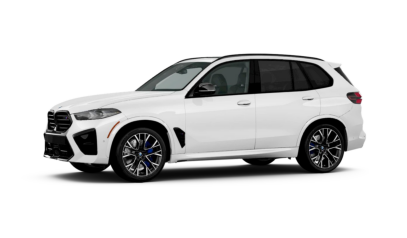

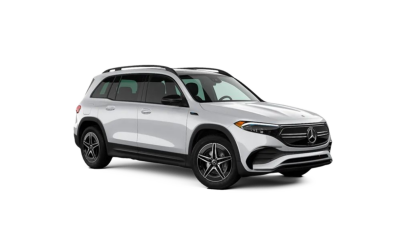

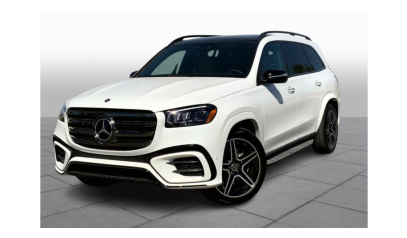

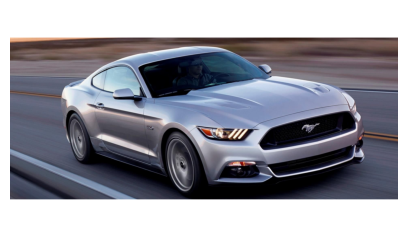

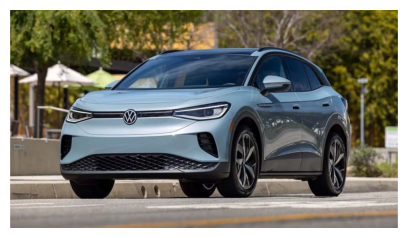

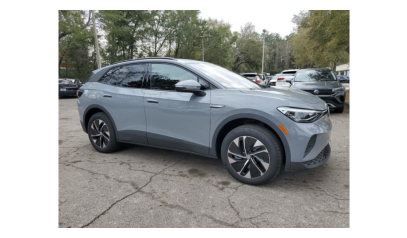

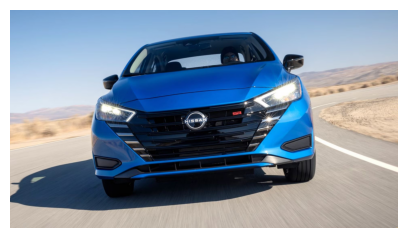

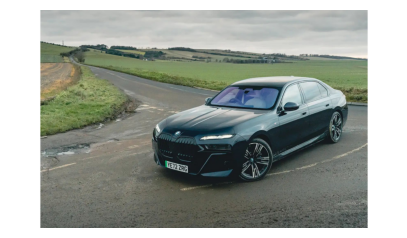

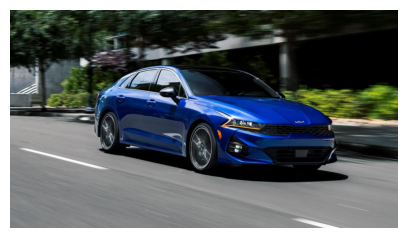

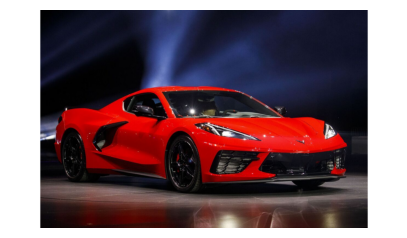

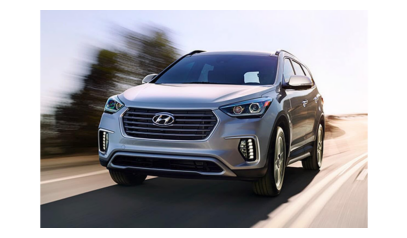

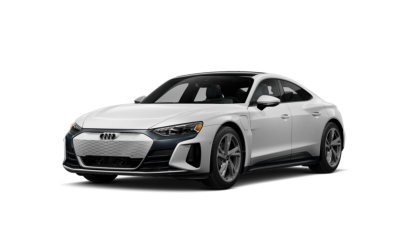

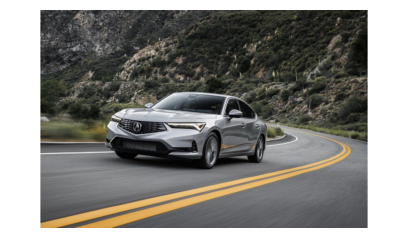

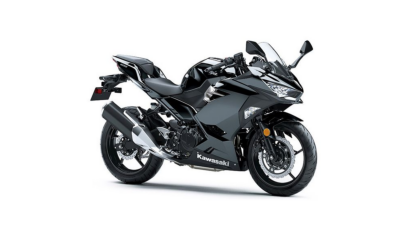

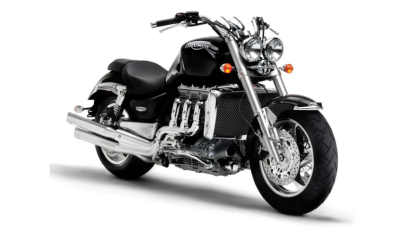

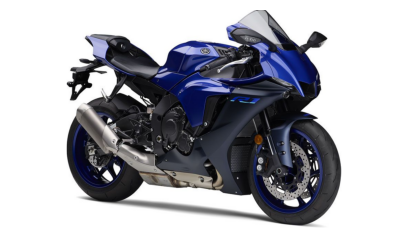

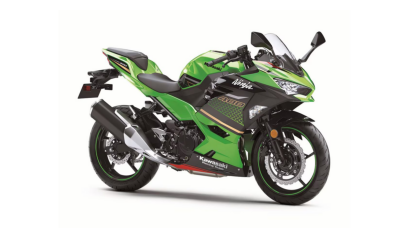

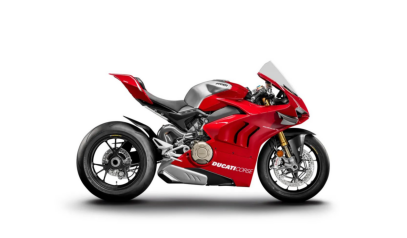

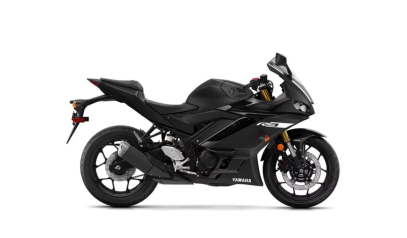

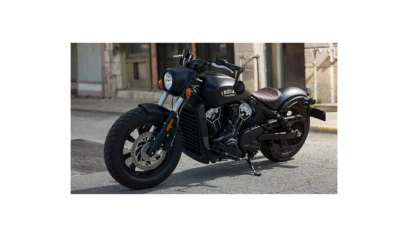

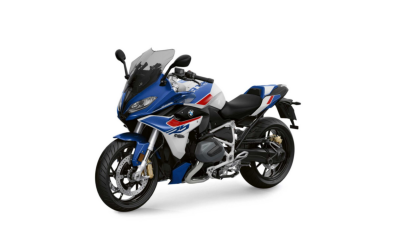

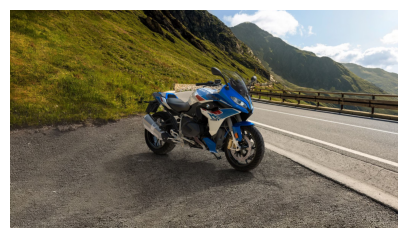

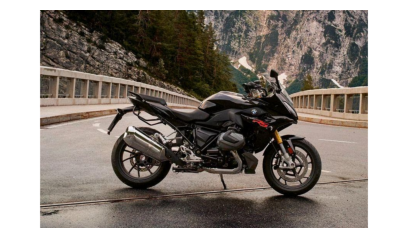

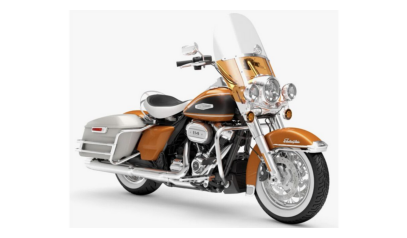

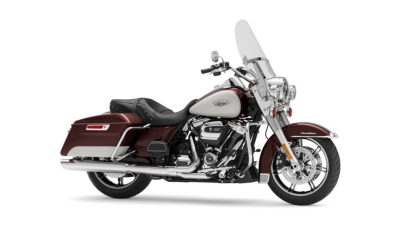

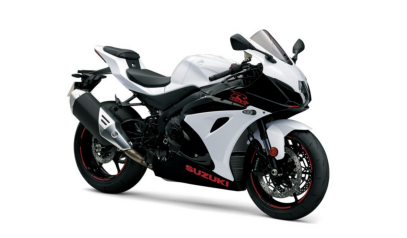

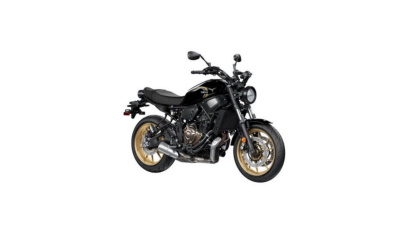

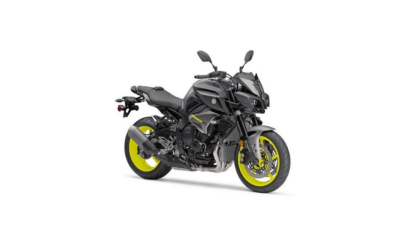

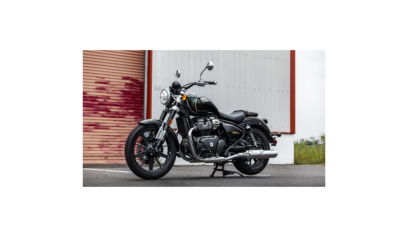

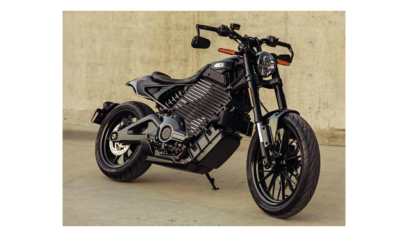

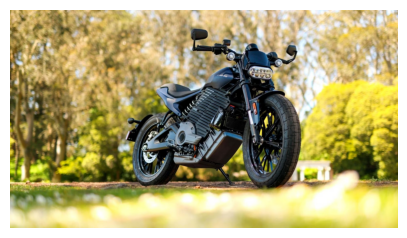

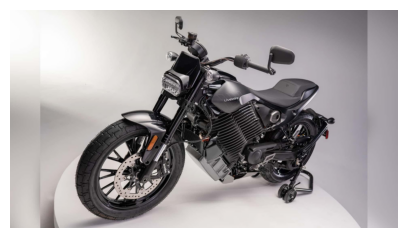

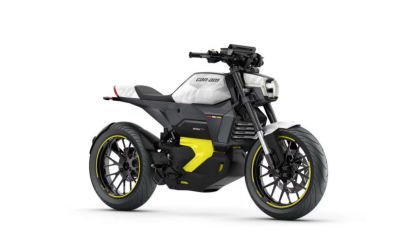

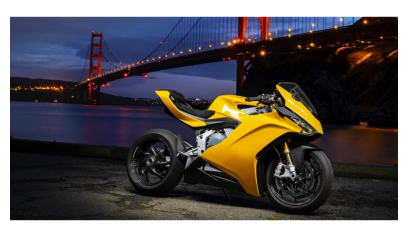

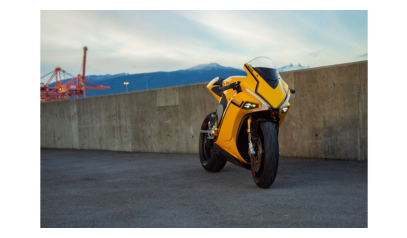

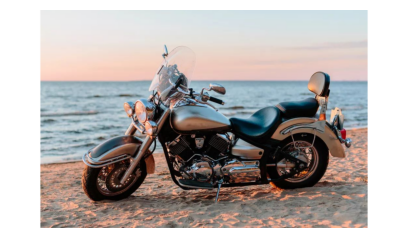

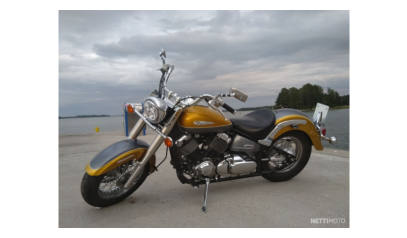

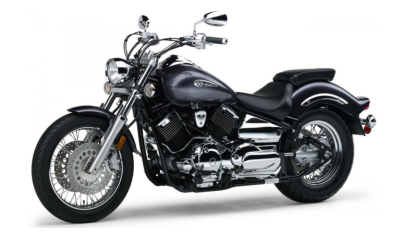

In [5]:
images = [] # List to store loaded images

for image in get_slides(url): #Load images from Google Slides, plot them, and append to list

    plot(image)

    images.append(load(image))

images = torch.vstack(images) #Stack images into a single tensor

In [6]:
images.shape

torch.Size([50, 3, 224, 224])

In [7]:
model(images)

tensor([[-4.0364, -1.5113, -2.2490,  ..., -5.4116, -2.2073,  2.7868],
        [-1.2643, -5.3959, -0.9197,  ..., -6.5779, -2.8994,  0.7817],
        [-8.7005, -6.1810,  2.0345,  ..., -5.6783, -3.3615,  4.4612],
        ...,
        [-1.5238, -5.7920,  1.2794,  ..., -2.5621,  0.6935,  0.0262],
        [-1.7540, -0.8945,  0.2604,  ..., -3.7733,  2.8081,  2.8769],
        [-1.7080, -2.3123, -2.6648,  ..., -6.7228, -0.1111,  3.8508]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)

In [9]:
y.shape

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy() #Predict the most likely class for each image

In [11]:
for i in list(guesses): #Print the class names for each prediction
    print(labels[i])

sports car, sport car
sports car, sport car
sports car, sport car
sports car, sport car
sports car, sport car
sports car, sport car
convertible
sports car, sport car
convertible
convertible
grille, radiator grille
sports car, sport car
beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
pickup, pickup truck
pickup, pickup truck
sports car, sport car
sports car, sport car
sports car, sport car
sports car, sport car
convertible
sports car, sport car
sports car, sport car
convertible
sports car, sport car
sports car, sport car
disk brake, disc brake
disk brake, disc brake
motor scooter, scooter
motor scooter, scooter
disk brake, disc brake
moped
Model T
motor scooter, scooter
motor scooter, scooter
moped
moped
moped
motor scooter, scooter
moped
moped
moped
moped
crash helmet
disk brake, disc brake
disk brake, disc brake
motor scooter, scooter
forklift
cannon
moped
disk brake, disc brake


In [12]:
Y = np.zeros(50,) #Prepare a binary label array for some purpose, perhaps binary classification or another task
Y[25:] = 1

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [15]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
 X = y.detach().cpu().numpy() #Detach the predictions from the GPU, convert to CPU numpy array for further processing

In [17]:
X.shape

(50, 1000)

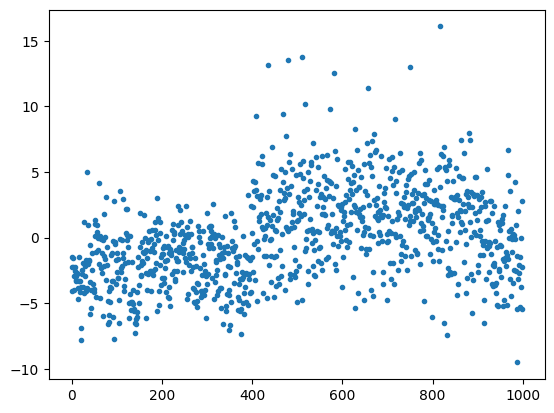

In [18]:
plt.plot(X[0],'.') #Display the first row of outputs as a scatter plot

(array([  7.,  83., 226., 295., 228., 116.,  33.,   5.,   5.,   2.]),
 array([-9.51626301, -6.955235  , -4.39420652, -1.8331784 ,  0.72784978,
         3.28887796,  5.84990597,  8.41093445, 10.97196293, 13.53299046,
        16.09401894]),
 <BarContainer object of 10 artists>)

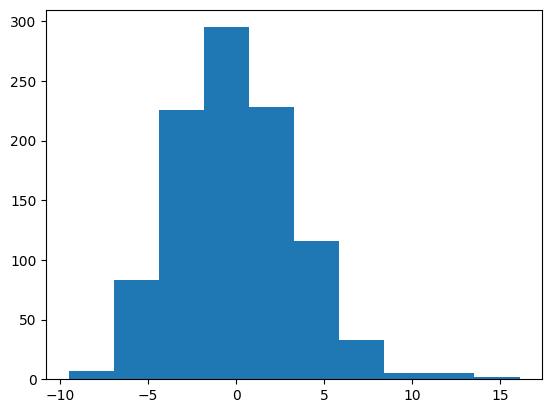

In [19]:
plt.hist(X[0]) #Histogram of the first row of outputs to visualize the distribution of class scores

In [20]:
X = GPU_data(X) #Convert the numpy array X back to a GPU tensor for further processing or training
Y = GPU_data(Y) # Convert the label array Y to a GPU tensor

In [21]:
def softmax(x): #Definition of the softmax function to convert logits to probabilities
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [22]:
def cross_entropy(outputs, labels): #Definition of cross-entropy loss function
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [23]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [24]:
def Truncated_Normal(size): #Define a truncated normal distribution for initializing weights, perhaps for another model

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [25]:
def acc(out,y): #Define an accuracy function to evaluate model performance
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [26]:
X.shape

torch.Size([50, 1000])

In [27]:
 def get_batch(mode): # Function to get a batch of data for training or testing
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [28]:
def model(x,w): #Define a simple linear model

    return x@w[0]

In [29]:
def make_plots(): #Function to log training accuracy using Weights and Biases

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [30]:
wb.init(project="Linear_Model_Photo_1"); #Initialize Weights & Biases project
c = wb.config #Configuration for W&B
#Set hyperparameters
c.h = 0.001 #Learning rate
c.b = 32 #Batch size
c.epochs = 100000 #Number of epochs

w = [GPU(Truncated_Normal((1000,2)))] #Initialize weights using truncated normal distribution

optimizer = torch.optim.Adam(w, lr=c.h) #Set up optimizer

for i in range(c.epochs): #Training loop

    x,y = get_batch('train') #Get a batch of data

    loss = cross_entropy(softmax(model(x,w)),y)  #Calculate loss

    optimizer.zero_grad() #Clear gradients
    loss.backward() #Backpropagate error
    optimizer.step() #Update weights

    wb.log({"loss": loss}) #Log loss to W&B

    make_plots() #Log accuracy to W&B


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-2192e47e6709>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)
